In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

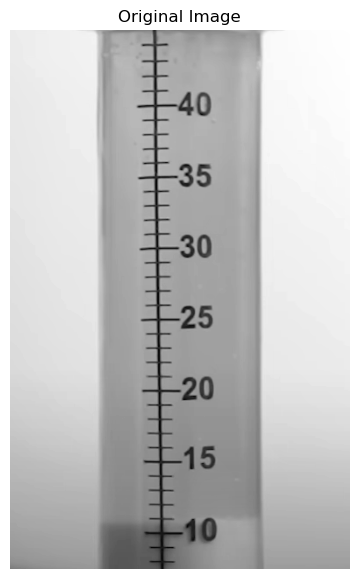

In [6]:
# Reading image
Gray_image = cv2.imread('/home/mohit.srivastava@Brightlifecare.local/Pictures/Screenshots/test_image.png', 0)

# Displaying image
plt.figure(figsize=[7,7])
plt.imshow(Gray_image, cmap='gray');plt.title("Original Image");plt.axis("off");

In [7]:
# Find all contours in the image
contours, hierarchy = cv2.findContours(Gray_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Display total contours found
print("Number of contours found = {}".format(len(contours)))

Number of contours found = 1


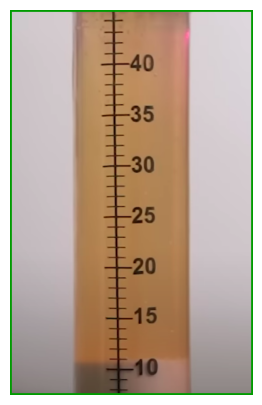

In [8]:
# Reading image in colored form for drawing boundary
image1_copy = cv2.imread('/home/mohit.srivastava@Brightlifecare.local/Pictures/Screenshots/test_image.png')

# Draw all the contours
cv2.drawContours(image1_copy, contours, -1, (0,155,0), 3)

# Display the result
plt.figure(figsize=[5,5])
plt.imshow(image1_copy[:,:,::-1]);plt.axis("off");

In [5]:
# Reading image
image2 = cv2.imread('/home/mohit.srivastava@Brightlifecare.local/Pictures/Screenshots/test_image.png')

[[[202 200 205]
  [202 200 205]
  [202 200 205]
  ...
  [222 216 223]
  [222 216 223]
  [222 216 223]]

 [[202 200 205]
  [202 200 205]
  [202 200 205]
  ...
  [222 216 223]
  [222 216 223]
  [222 216 223]]

 [[202 200 205]
  [202 200 205]
  [202 200 205]
  ...
  [221 215 222]
  [222 216 223]
  [222 216 223]]

 ...

 [[108 109 117]
  [109 110 118]
  [109 110 118]
  ...
  [132 132 140]
  [132 132 140]
  [132 132 140]]

 [[106 107 115]
  [106 107 115]
  [107 108 116]
  ...
  [132 132 140]
  [132 132 140]
  [132 132 140]]

 [[103 104 112]
  [104 105 113]
  [106 106 114]
  ...
  [132 132 140]
  [132 132 140]
  [132 132 140]]]


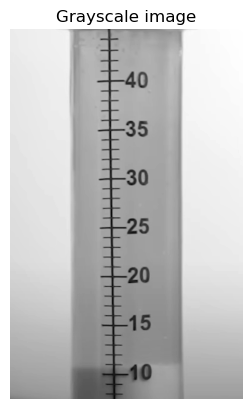

In [15]:
# Making copy of source image
image2_copy = image2.copy()
print(image2_copy)

# Convert to Grayscale
gray = cv2.cvtColor(image2_copy, cv2.COLOR_BGR2GRAY)

# Display result
plt.imshow(gray, cmap="gray");plt.title("Grayscale image");plt.axis("off");

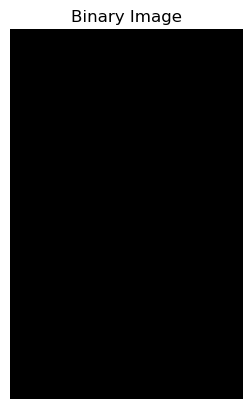

In [14]:
# Create Binary Threshold image
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)

happy_array = np.random.randn(28, 28)
im = plt.imshow(happy_array, cmap='seismic', interpolation='none')
cbar = plt.colorbar(im)
plt.show()

# Display image
plt.imshow(binary, cmap="gray");plt.title("Binary Image");plt.axis("off");

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

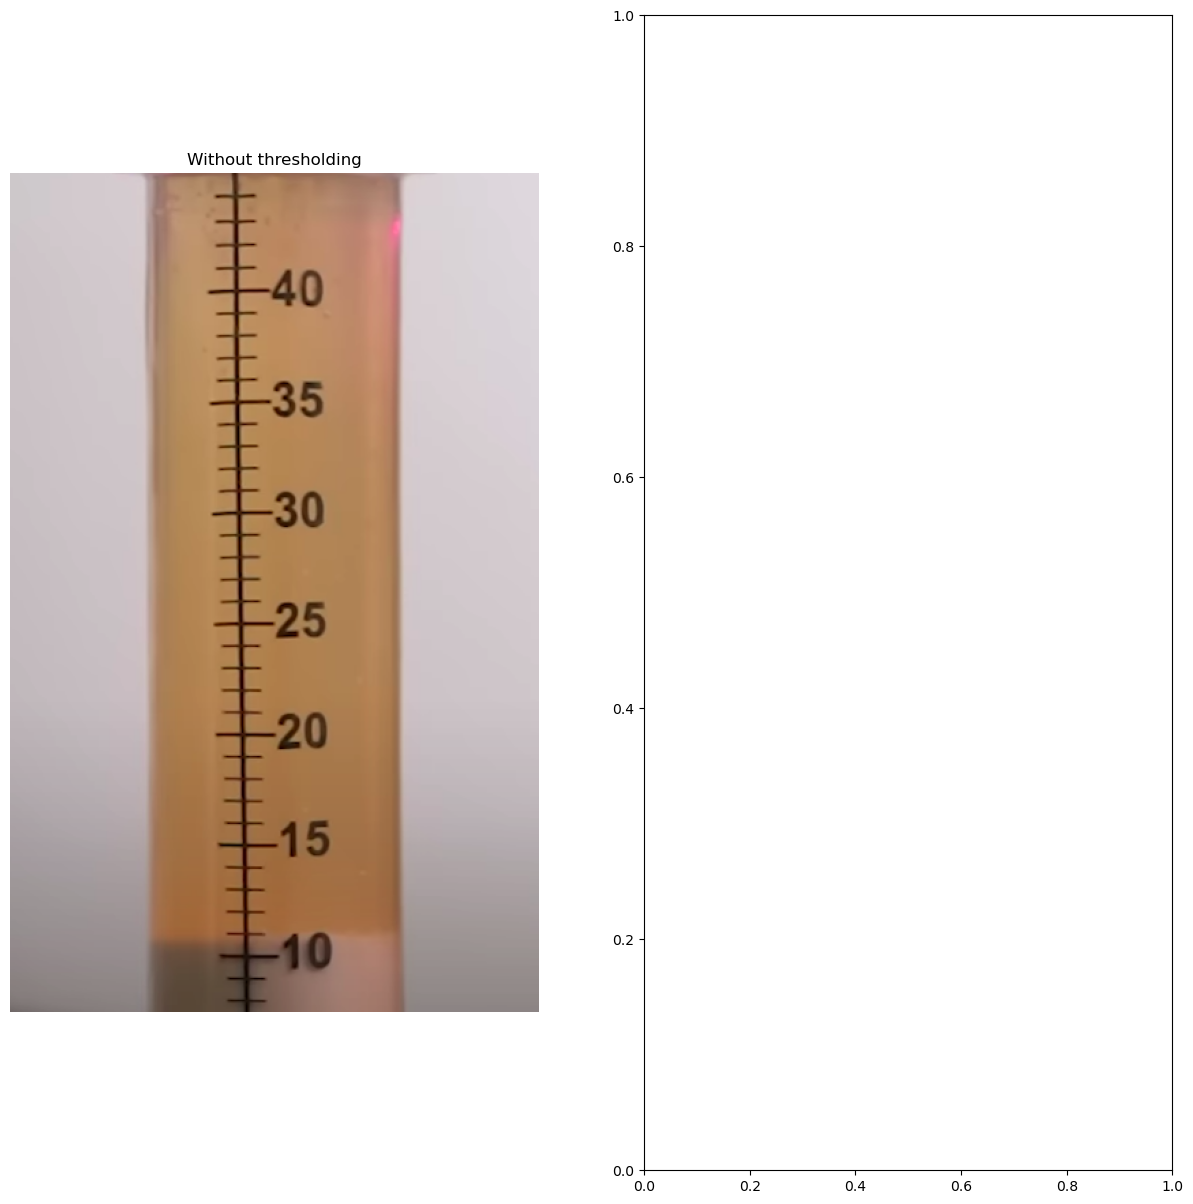

In [13]:
# Copy of source img
image2_copy2 = binary.copy()

# find contours from threshold img
contours, hierarchy = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# draw all the contours found
image2_copy2 = cv2.drawContours(image2_copy2, contours, -1, (0,0,255), 2)

# Plot both results for comparison
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(image2_copy[:,:,::-1]);plt.title("Without thresholding");plt.axis("off")
plt.subplot(122);plt.imshow(image2_copy2[:,:,::-1]);plt.title("With thresholding");plt.axis("off");

In [86]:
img = cv2.imread('/home/mohit.srivastava@Brightlifecare.local/Pictures/Screenshots/test_image.png')

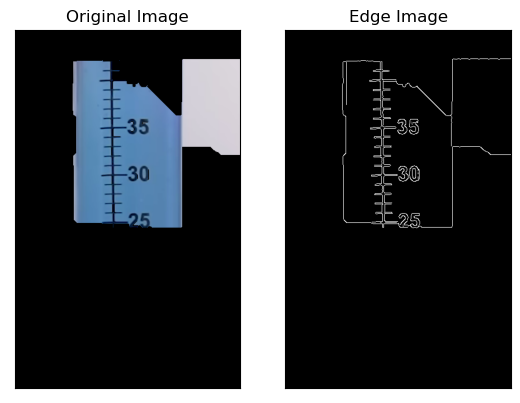

In [85]:
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

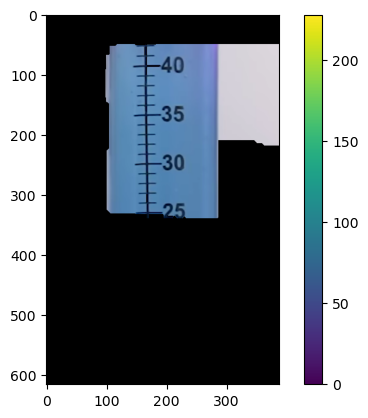

(<matplotlib.image.AxesImage at 0x7fd79c70d4c0>,
 None)

In [87]:
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

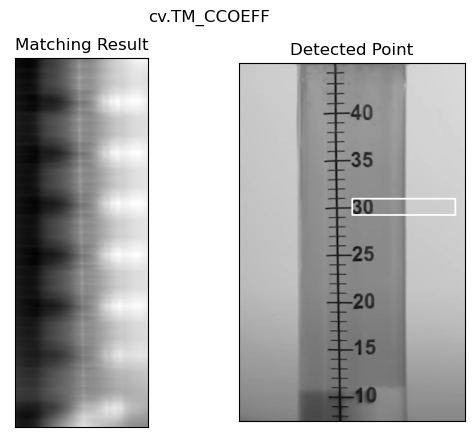

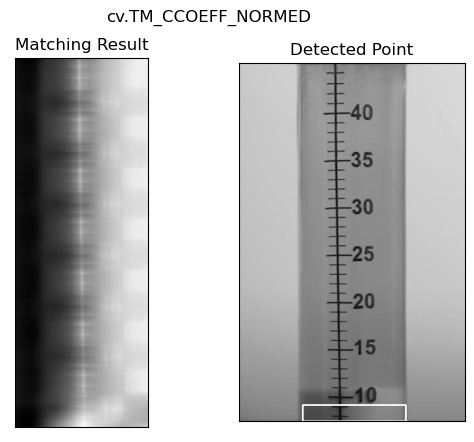

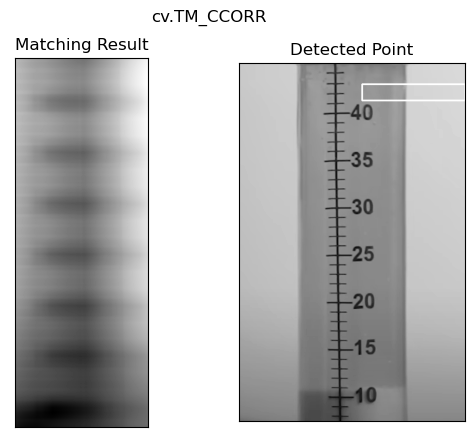

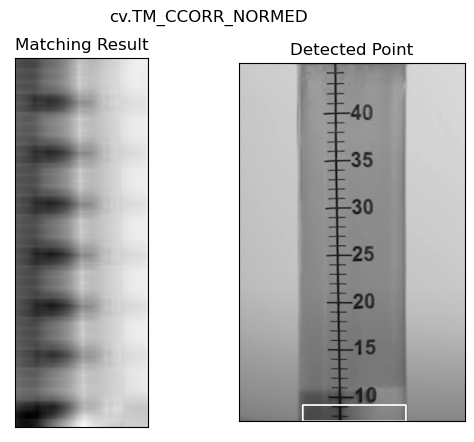

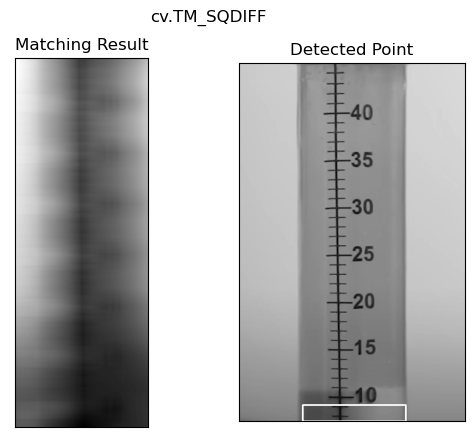

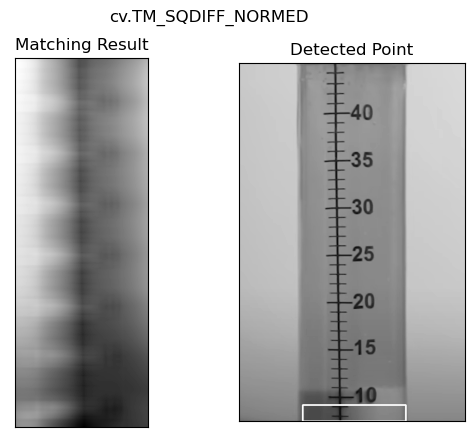

In [91]:
img = cv.imread('/home/mohit.srivastava@Brightlifecare.local/Pictures/Screenshots/test_image.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
img2 = img.copy()
template = cv.imread('/home/mohit.srivastava@Brightlifecare.local/Pictures/Screenshots/template.png', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

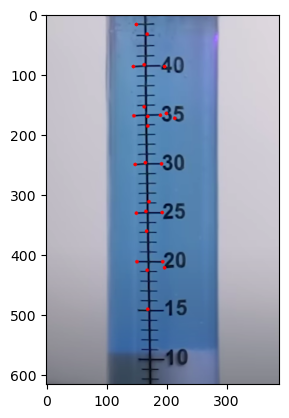

(<matplotlib.image.AxesImage at 0x7fa0f182d220>, None)

In [3]:
img = cv.imread('/home/mohit.srivastava@Brightlifecare.local/Pictures/Screenshots/test_image.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(img,(x,y),3,255,-1)
plt.imshow(img),plt.show()

In [4]:
img = cv.imread('/home/mohit.srivastava@Brightlifecare.local/Pictures/Screenshots/test_image.png', cv.IMREAD_GRAYSCALE)

# Initiate FAST detector
star = cv.xfeatures2d.StarDetector_create()
# Initiate BRIEF extractor
brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
# find the keypoints with STAR
kp = star.detect(img,None)
# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)
print( brief.descriptorSize() )
print( des.shape )

AttributeError: module 'cv2' has no attribute 'xfeatures2d'

In [1]:
import cv2
  
# Import the image
file_name = '/home/mohit.srivastava@Brightlifecare.local/Pictures/Screenshots/test_image.png'
  
# Read the image
src = cv2.imread(file_name, 1)
  
# Convert image to image gray
tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
  
# Applying thresholding technique
_, alpha = cv2.threshold(tmp, 0, 255, cv2.THRESH_BINARY)
  
# Using cv2.split() to split channels 
# of coloured image
b, g, r = cv2.split(src)
  
# Making list of Red, Green, Blue
# Channels and alpha
rgba = [b, g, r, alpha]
  
# Using cv2.merge() to merge rgba
# into a coloured/multi-channeled image
dst = cv2.merge(rgba, 4)
  
# Writing and saving to a new image
cv2.imwrite("gfg_white.png", dst)

True

Resized Dimensions :  (256, 256)


(-0.5, 255.5, 255.5, -0.5)

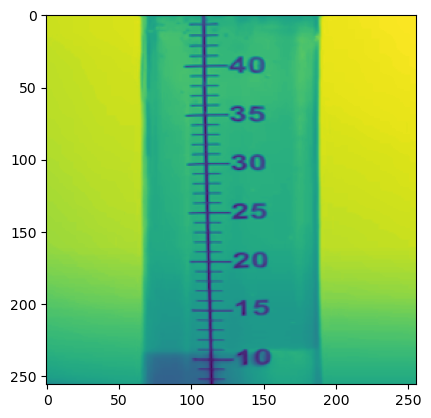

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/home/mohit.srivastava@Brightlifecare.local/Pictures/Screenshots/test_image.png', cv2.IMREAD_UNCHANGED)
 
#print('Original Dimensions : ',img.shape)
 
#scale_percent = 60 # percent of original size
width = 256
height = 256
dim = (width, height)

# Convert to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# resize image
resized = cv2.resize(gray, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
 
plt.imshow(resized);plt.axis("on")

In [2]:
print(gray.shape)

(616, 388)


In [3]:
np.max(gray)

219

In [4]:
gray[75:175, 240:255]

array([[150, 150, 149, ..., 147, 146, 146],
       [149, 149, 149, ..., 147, 146, 146],
       [148, 148, 148, ..., 147, 148, 147],
       ...,
       [145, 145, 145, ..., 143, 143, 143],
       [145, 145, 144, ..., 143, 143, 143],
       [144, 144, 144, ..., 143, 143, 143]], dtype=uint8)

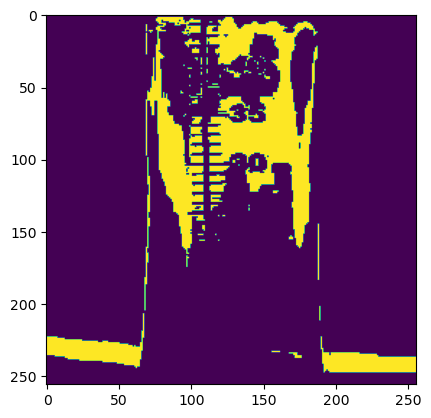

In [7]:
plt.imshow(np.where((resized<150) & (resized>140),1,0))

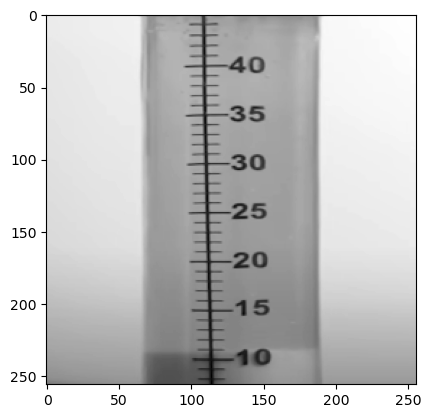

In [8]:
plt.imshow(resized, cmap="gray")

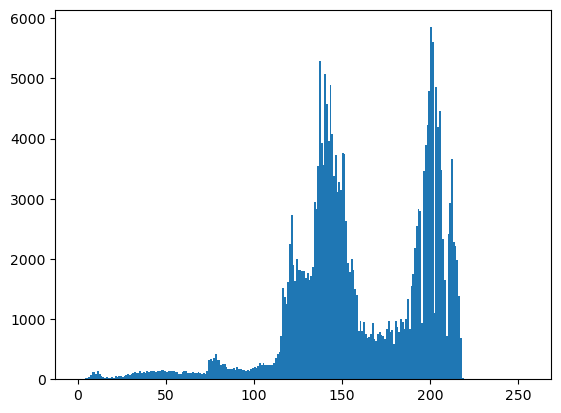

In [12]:
img = cv2.imread('/home/mohit.srivastava@Brightlifecare.local/Pictures/Screenshots/test_image.png', cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
plt.hist(img.ravel(),256,[0,256]); plt.show()

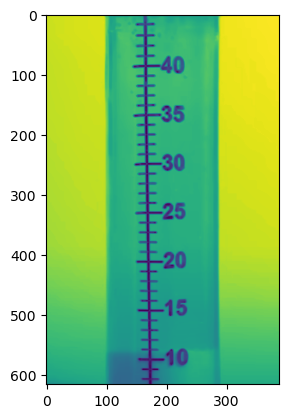

In [30]:
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
dilatation_dst = cv2.erode(img, element, iterations = 1)
plt.imshow(dilatation_dst)

In [31]:
# Find all contours in the image
contours, hierarchy = cv2.findContours(dilatation_dst, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Display total contours found
print("Number of contours found = {}".format(len(contours)))


# Draw all the contours
#cv2.drawContours(image1_copy, contours, -1, (0,155,0), 3)

# Display the result
#plt.figure(figsize=[10,10])
#plt.imshow(image1_copy[:,:,::-1]);plt.axis("off");

Number of contours found = 1
